In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
file = './data_cleaned/merged_cleaned_data.csv'
df = pd.read_csv(file, parse_dates=["Datum"], dayfirst=True)

In [37]:
print(df.head())

                Datum               Product  Aantal * prijs
0 2022-09-29 18:54:00  Too late - Rush Hour            50.0
1 2022-09-29 18:54:00         Shot tequila              9.0
2 2022-09-29 18:54:00             Heineken              7.0
3 2022-09-29 18:54:00          Recycle munt             5.0
4 2022-09-29 18:54:00       Buitenlands mix             8.5


In [38]:
df["Dag"] = df["Datum"].dt.date
df["Uur"] = df["Datum"].dt.hour

In [45]:
omzet_uur_dag = df.groupby(["Dag", "Uur"])["Aantal * prijs"].sum().reset_index()
gem_omzet_uur = omzet_uur_dag.groupby("Uur")["Aantal * prijs"].mean()
std_omzet_uur = omzet_uur_dag.groupby("Uur")["Aantal * prijs"].std()

In [52]:
lower_bound = np.maximum(gem_omzet_uur - std_omzet_uur, 0)  # Prevent going below 0
upper_bound = gem_omzet_uur + std_omzet_uur

error = [gem_omzet_uur - lower_bound, upper_bound - gem_omzet_uur]

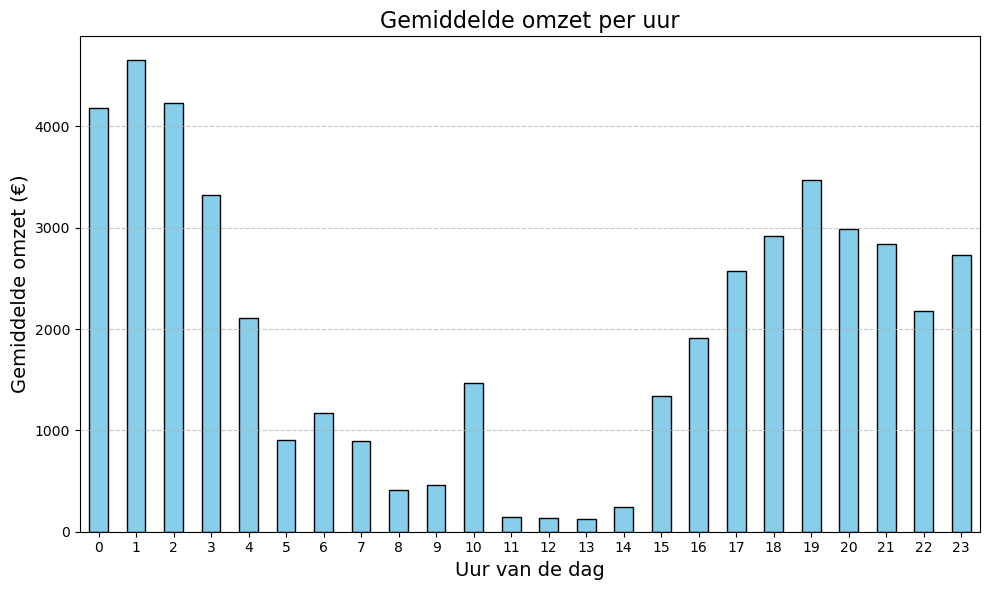

In [56]:
plt.figure(figsize=(10, 6))
gem_omzet_uur.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Gemiddelde omzet per uur", fontsize=16)
plt.xlabel("Uur van de dag", fontsize=14)
plt.ylabel("Gemiddelde omzet (€)", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
# plt.errorbar(gem_omzet_uur.index, gem_omzet_uur, yerr=error, fmt='none', ecolor='red', capsize=5)

plt.show()

In [57]:
# Visualize only for periods when lofi is opened

scan_bar_merge_file = './data_output/merged_ticket_bar.csv'

scan_bar_merged_df = pd.read_csv(scan_bar_merge_file)

scan_bar_merged_df.head()

/var/folders/ct/jf_08df550xfjwz0vgn47cz80000gn/T/ipykernel_40322/4211529200.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  scan_bar_merged_df = pd.read_csv(scan_bar_merge_file)


,order_id,shop_name,event_name,event_category,event_subcategories,first_event_date_start,last_event_date_end,ticket_name,barcode,first_scanned_at,order.metadata.date_of_birth,order.metadata.city,order.metadata.gender,is_scanned,order.metadata.country,order.metadata.age,Datum,Product,Aantal * prijs
0,3880811d-696b-48bd-aeed-e952923bfd7c,No Art Festival After General Shop,No Art Festival After | By Day | No Phone Poli...,festival,other,2024-07-28 14:00:00,2024-07-28 23:00:00,General Release,TS9V55YW83R365XASKR,NaN,1985-06-13,Lijnden,male,NaN,NaN,NaN,NaN,NaN,NaN
1,ca0f2528-8c59-44b6-b4a0-00328cf3cfa0,No Art Festival After General Shop,No Art Festival After | By Day | No Phone Poli...,festival,other,2024-07-28 14:00:00,2024-07-28 23:00:00,General Release,TGWHXJQ2P8UR62YD8HW,NaN,1985-06-13,Lijnden,male,NaN,NaN,NaN,NaN,NaN,NaN
2,ca0f2528-8c59-44b6-b4a0-00328cf3cfa0,No Art Festival After General Shop,No Art Festival After | By Day | No Phone Poli...,festival,other,2024-07-28 14:00:00,2024-07-28 23:00:00,General Release,TA2EYSKDWBRZ4TNXE46,NaN,1985-06-13,Lijnden,male,NaN,NaN,NaN,NaN,NaN,NaN
3,ca0f2528-8c59-44b6-b4a0-00328cf3cfa0,No Art Festival After General Shop,No Art Festival After | By Day | No Phone Poli...,festival,other,2024-07-28 14:00:00,2024-07-28 23:00:00,General Release,TDY9CNFR2AXJH8NG3NB,NaN,1985-06-13,Lijnden,male,NaN,NaN,NaN,NaN,NaN,NaN
4,ca0f2528-8c59-44b6-b4a0-00328cf3cfa0,No Art Festival After General Shop,No Art Festival After | By Day | No Phone Poli...,festival,other,2024-07-28 14:00:00,2024-07-28 23:00:00,General Release,THT3US2R7Z2K22NTM8N,NaN,1985-06-13,Lijnden,male,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
filtered_scan_bar = scan_bar_merged_df[scan_bar_merged_df['last_event_date_end'].notnull()]

In [ ]:
plt.figure(figsize=(10, 6))
filtered_scan_bar.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Gemiddelde omzet per uur", fontsize=16)
plt.xlabel("Uur van de dag", fontsize=14)
plt.ylabel("Gemiddelde omzet (€)", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
# plt.errorbar(gem_omzet_uur.index, gem_omzet_uur, yerr=error, fmt='none', ecolor='red', capsize=5)

plt.show()